In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = load_iris()

In [3]:
X = dataset.data

In [4]:
y = dataset.target 

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

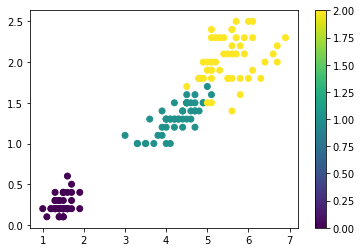

In [7]:
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.colorbar()

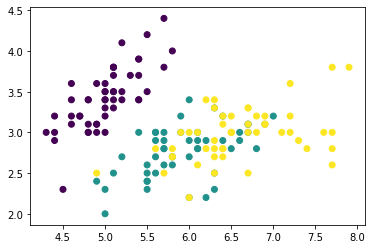

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(3)

In [10]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [12]:
cluster_label = kmeans.predict(X)

In [13]:
cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

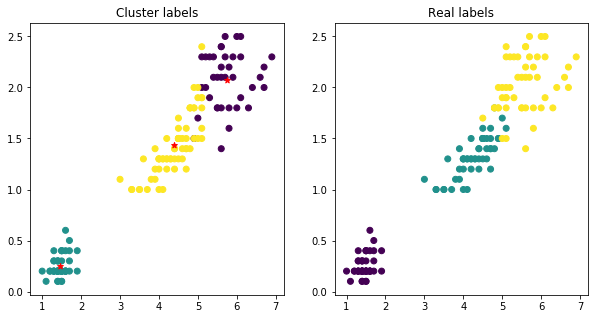

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Cluster labels')
plt.scatter(X[:, 2], X[:, 3], c=cluster_label)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker='*', color='red')

plt.subplot(122)
plt.title('Real labels')
plt.scatter(X[:, 2], X[:, 3], c=y)

In [18]:
kmeans.fit(X[:, 2:])

KMeans(n_clusters=3)

In [19]:
cluster_label = kmeans.predict(X[:, 2:])

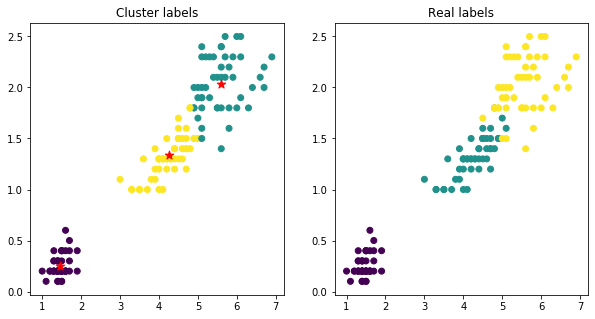

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Cluster labels')
plt.scatter(X[:, 2], X[:, 3], c=cluster_label)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], marker='*', color='red', s=80)

plt.subplot(122)
plt.title('Real labels')
plt.scatter(X[:, 2], X[:, 3], c=y)

In [22]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92461872 0.05306648]
[25.09996044  6.01314738]


In [39]:
x_proj = pca.transform(X)

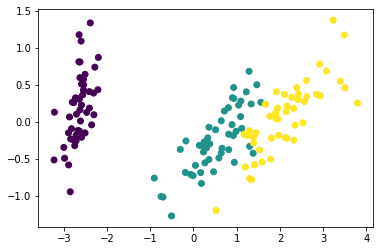

In [40]:
plt.scatter(x_proj[:, 0], x_proj[:, 1], c=y)

[0.92461872]
[25.09996044]


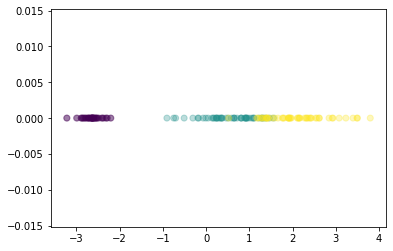

In [41]:
pca = PCA(n_components=1)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

x_proj = pca.transform(X)
plt.scatter(x_proj[:, 0], [0]*len(x_proj), c=y, alpha=0.3)